In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
import seaborn as sns

In [3]:
df= pd.read_csv("imports-85.data", na_values='?')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
df.shape

(205, 26)

In [5]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [275]:
# replace below code with na_values option above in 13
# for col in df.columns:
#     for i in range(205):
#         if df.loc[i,col] == '?':
#             df.loc[i,col] = np.nan

In [7]:
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
#change numinal datas which were seted wrongly object
obj_col = ['bore','stroke','horsepower','peak-rpm','price', 'normalized-losses']
df[obj_col] = df[obj_col].astype('float64')

In [9]:
df.info()
df["num-of-doors"].replace(np.nan, "four", inplace=True) # https://www.kaggle.com/code/ganeshlokare/automobile-price-prediction


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [10]:
knn_impute = KNNImputer()
#define numinak columns
num_col = [col for col in df.columns if df[col].dtype in ['int64','float64']]

In [11]:
num_col

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [12]:
data_num = pd.DataFrame(knn_impute.fit_transform(df[num_col]))

In [13]:
data_num

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,3.0,123.8,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,144.8,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,144.8,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.0,95.0,109.1,188.8,68.9,55.5,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,-1.0,95.0,109.1,188.8,68.8,55.5,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,-1.0,95.0,109.1,188.8,68.9,55.5,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,-1.0,95.0,109.1,188.8,68.9,55.5,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [14]:

data_num.columns = df[num_col].columns
df = df.drop(num_col,axis=1)
df = pd.concat([df,data_num],axis=1)


In [15]:
df

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,...,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,...,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi,...,2548.0,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,...,2823.0,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi,...,2337.0,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi,...,2824.0,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi,...,2952.0,141.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi,...,3049.0,141.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi,...,3012.0,173.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi,...,3217.0,145.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


In [16]:
df.isna().sum()

make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
engine-type          0
num-of-cylinders     0
fuel-system          0
symboling            0
normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [17]:
price_col =df.price
df = df.drop(['price','normalized-losses'],axis=1)

<AxesSubplot:>

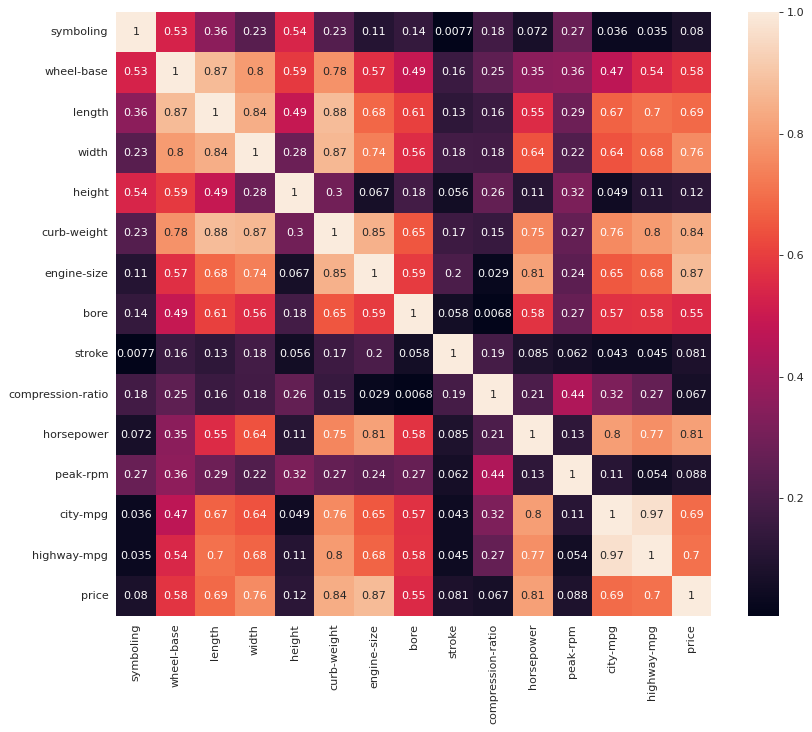

In [18]:
corr_lst = [col for col in df.columns if df[col].dtype=='float64']
corr = pd.concat([df[corr_lst],price_col],axis=1)
fig = plt.figure(figsize=(12,10),dpi=80)
sns.heatmap(corr.corr().abs(),annot=True)

In [19]:
df.corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.144208,-0.007697,-0.178515,0.071762,0.270895,-0.035823,0.034606
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.491651,0.160522,0.249786,0.352275,-0.361191,-0.470414,-0.544082
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.607498,0.129212,0.158414,0.553981,-0.285425,-0.670909,-0.704662
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.557746,0.182775,0.181129,0.641952,-0.219250,-0.642704,-0.677218
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.184633,-0.056276,0.261214,-0.110433,-0.317618,-0.048640,-0.107358
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.649119,0.168171,0.151362,0.750917,-0.265798,-0.757414,-0.797465
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.593409,0.201854,0.028971,0.810582,-0.244197,-0.653658,-0.677470
bore,-0.144208,0.491651,0.607498,0.557746,0.184633,0.649119,0.593409,1.000000,-0.057933,0.006754,0.575271,-0.268131,-0.571880,-0.575184
stroke,-0.007697,0.160522,0.129212,0.182775,-0.056276,0.168171,0.201854,-0.057933,1.000000,0.185888,0.085374,-0.062144,-0.042648,-0.044573
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.006754,0.185888,1.000000,-0.205455,-0.436229,0.324701,0.265201


In [20]:
non_corr_on_price = ["symboling", "normalized-losses", "height", "stroke", "compression-ratio", "peak-rpm"]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               205 non-null    object 
 1   fuel-type          205 non-null    object 
 2   aspiration         205 non-null    object 
 3   num-of-doors       205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   engine-type        205 non-null    object 
 8   num-of-cylinders   205 non-null    object 
 9   fuel-system        205 non-null    object 
 10  symboling          205 non-null    float64
 11  wheel-base         205 non-null    float64
 12  length             205 non-null    float64
 13  width              205 non-null    float64
 14  height             205 non-null    float64
 15  curb-weight        205 non-null    float64
 16  engine-size        205 non

In [21]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['num-of-doors'] = label_encoder.fit_transform(df['num-of-doors'])

In [22]:
df['fuel-type'] = label_encoder.fit_transform(df['fuel-type'])
df['aspiration'] = label_encoder.fit_transform(df['aspiration'])
df['body-style'] = label_encoder.fit_transform(df['body-style'])
df['drive-wheels'] = label_encoder.fit_transform(df['drive-wheels'])
df['engine-location'] = label_encoder.fit_transform(df['engine-location'])
df['engine-type'] = label_encoder.fit_transform(df['engine-type'])
df['num-of-cylinders'] = label_encoder.fit_transform(df['num-of-cylinders'])
df['fuel-system'] = label_encoder.fit_transform(df['fuel-system'])
df['make'] = label_encoder.fit_transform(df['make'])


In [113]:
cat_features = ['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
encoded_data = pd.get_dummies(df, columns = cat_features)
encoded_data.head()
encoded_data.isna().sum()
data = encoded_data.drop('price', axis = 1)
price_col = encoded_data['price']
#price_col = label

In [23]:
#non_corr_on_price = ["symboling", "normalized-losses", "height", "stroke", "compression-ratio", "peak-rpm", "fuel-type",
#                    "aspiration", "num-of-doors", "body-style", "engine-location", "engine-type", "num-of-cylinders", "drive-wheels"]

non_corr_on_price = ["symboling", "height", "stroke", "compression-ratio", "peak-rpm", "fuel-type",
                     "aspiration", "num-of-doors", "body-style", "engine-location", "engine-type", "num-of-cylinders", "drive-wheels"]

df = df.drop(non_corr_on_price,axis=1)
df = df.drop(["fuel-system", "make"],axis=1)

In [24]:
# Linear Regression:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model = LinearRegression()

in_train, in_test, out_train, out_test = train_test_split(df, price_col, test_size=0.1, random_state=5)

In [25]:
model.fit(in_train, out_train)
pred = model.predict(in_train)

In [26]:
from sklearn.metrics import r2_score, mean_squared_error
print(f"Train MSE : {mean_squared_error(out_train, pred)}")
print(f"Train R2 : {r2_score(out_train, pred)}")

Train MSE : 12285665.230743235
Train R2 : 0.8052814791490581


In [27]:
test_pred = model.predict(in_test)
print(f"MSE : {mean_squared_error(out_test, test_pred)}")
print(f"R2 : {r2_score(out_test, test_pred)}")


MSE : 2455324.65868698
R2 : 0.9641795128776421


In [212]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

std_in_train = scaler.fit_transform(in_train)
std_in_test = scaler.transform(in_test)

model.fit(std_in_train, out_train)
pred = model.predict(std_in_train)
print(f'train accuracy: {model.score(std_in_train, out_train)}')
print(f'test accuracy: {model.score(std_in_test, out_test)}')


print(f"Train MSE : {mean_squared_error(out_train, pred)}")
print(f"Train R2 : {r2_score(out_train, pred)}")

test_pred = model.predict(std_in_test)
print(f"MSE : {mean_squared_error(test_pred, out_test)}")
print(f"R2 : {r2_score(out_test, test_pred)}")
print(f"Coeff is {model.coef_}, Intecept is {model.intercept_}")

train accuracy: 0.8052814791490581
test accuracy: 0.9641795128776423
Train MSE : 12285665.230743237
Train R2 : 0.8052814791490581
MSE : 2455324.6586869666
R2 : 0.9641795128776423


In [213]:
print(std_in_train.shape, std_in_test.shape, out_train.shape, out_test.shape  )

(184, 9) (21, 9) (184,) (21,)


In [28]:
# SGD regression
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(alpha=0.02) # alpha is learning rate
in_train, in_test, out_train, out_test = train_test_split(df, price_col, test_size=0.1, random_state=5)
model.fit(in_train, out_train)
pred = model.predict(in_train)
print(f"Train MSE : {mean_squared_error(out_train, pred)}")
print(f"Train R2 : {r2_score(out_train, pred)}")

test_pred = model.predict(in_test)
print(f"MSE : {mean_squared_error(out_test, test_pred)}")
print(f"R2 : {r2_score(out_test, test_pred)}")

Train MSE : 3.607068970245297e+30
Train R2 : -5.716932061081433e+22
MSE : 3.503292346115937e+30
R2 : -5.110918343361088e+22


In [123]:
# Since we are getting -ve r2 , performing normalisation on all num columns
num_col.remove("normalized-losses")

In [126]:
num_col.remove("price")

In [127]:
def perfrom_normalisation(columns):
    for column in columns:
        column_min = df[column].min()
        column_max = df[column].max()
        df[column] = (df[column] - column_min)/(column_max - column_min)

In [217]:
col = df.columns
print(col)
df.head()

Index(['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore',
       'horsepower', 'city-mpg', 'highway-mpg'],
      dtype='object')


,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg
0,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0
1,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0
2,94.5,171.2,65.5,2823.0,152.0,2.68,154.0,19.0,26.0
3,99.8,176.6,66.2,2337.0,109.0,3.19,102.0,24.0,30.0
4,99.4,176.6,66.4,2824.0,136.0,3.19,115.0,18.0,22.0


In [223]:
perfrom_normalisation(columns=col)
df.head()
for column in col:
        column_min = df[column].min()
        column_max = df[column].max()
        df[column] = (df[column] - column_min)/(column_max - column_min)
df.head()

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg
0,0.058309,0.413433,0.316667,0.411171,0.260377,0.664286,0.262500,0.222222,0.289474
1,0.058309,0.413433,0.316667,0.411171,0.260377,0.664286,0.262500,0.222222,0.289474
2,0.230321,0.449254,0.433333,0.517843,0.343396,0.100000,0.441667,0.166667,0.263158
3,0.384840,0.529851,0.491667,0.329325,0.181132,0.464286,0.225000,0.305556,0.368421
4,0.373178,0.529851,0.508333,0.518231,0.283019,0.464286,0.279167,0.138889,0.157895


In [230]:
# SGD Regressor after normalisation
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(alpha=0.02) # alpha is learning rate
in_train, in_test, out_train, out_test = train_test_split(df, price_col, test_size=0.1, random_state=5)
model.fit(in_train, out_train)
pred = model.predict(in_train)
print(f"Train MSE : {mean_squared_error(out_train, pred)}")
print(f"Train R2 : {r2_score(out_train, pred)}")

test_pred = model.predict(in_test)
print(f"MSE : {mean_squared_error(out_test, test_pred)}")
print(f"R2 : {r2_score(out_test, test_pred)}")
print(f"Coeff is {model.coef_}, Intecept is {model.intercept_}")

Train MSE : 16100977.028687922
Train R2 : 0.7448116668981188
MSE : 6886800.612779555
R2 : 0.8995291511484934
Coeff is [ 1744.3759654   2754.71748313  5162.64040864  6538.78888441
  7920.37932866  2753.40535936  7457.82960372 -3122.48260191
 -2821.06639541], Intecept is [3022.83087437]


In [29]:
# Ridge regressor
from sklearn.linear_model import Ridge
model = Ridge(alpha=1)
in_train, in_test, out_train, out_test = train_test_split(df, price_col, test_size=0.1, random_state=5)
model.fit(in_train, out_train)
pred = model.predict(in_train)
print(f"Train MSE : {mean_squared_error(out_train, pred)}")
print(f"Train R2 : {r2_score(out_train, pred)}")

test_pred = model.predict(in_test)
print(f"MSE : {mean_squared_error(out_test, test_pred)}")
print(f"R2 : {r2_score(out_test, test_pred)}")
print(f"Coeff is {model.coef_}, Intecept is {model.intercept_}")


Train MSE : 12286222.56373681
Train R2 : 0.8052726458417775
MSE : 2516651.0974631147
R2 : 0.9632848275647778
Coeff is [  88.96168873  -61.25978371  533.78075317    3.16944419   82.05134909
 -798.70813664   49.82201214 -142.49768431  119.41617786], Intecept is -41185.12600844056


In [30]:
# Lasso Regressor

from sklearn.linear_model import Lasso
model = Lasso(alpha=1)  # range of alpha 0.1 - 10
in_train, in_test, out_train, out_test = train_test_split(df, price_col, test_size=0.1, random_state=5)
model.fit(in_train, out_train)
pred = model.predict(in_train)
print(f"Train MSE : {mean_squared_error(out_train, pred)}")
print(f"Train R2 : {r2_score(out_train, pred)}")

test_pred = model.predict(in_test)
print(f"MSE : {mean_squared_error(out_test, test_pred)}")
print(f"R2 : {r2_score(out_test, test_pred)}")
print(f"Coeff is {model.coef_}, Intecept is {model.intercept_}")

Train MSE : 12285698.090596939
Train R2 : 0.8052809583451792
MSE : 2469173.277499112
R2 : 0.9639774767558333
Coeff is [  88.35387859  -60.22860872  535.33835433    3.17111074   82.09941145
 -895.93861943   49.94130923 -142.88284219  119.71297966], Intecept is -41105.25531086639


In [31]:
# ElasticNet Regressor
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=1, l1_ratio=0.9)
in_train, in_test, out_train, out_test = train_test_split(df, price_col, test_size=0.1, random_state=5)
model.fit(in_train, out_train)
pred = model.predict(in_train)
print(f"Train MSE : {mean_squared_error(out_train, pred)}")
print(f"Train R2 : {r2_score(out_train, pred)}")

test_pred = model.predict(in_test)
print(f"MSE : {mean_squared_error(out_test, test_pred)}")
print(f"R2 : {r2_score(out_test, test_pred)}")
print(f"Coeff is {model.coef_}, Intecept is {model.intercept_}")


Train MSE : 12305194.237850912
Train R2 : 0.8049719591266358
MSE : 2831559.446211217
R2 : 0.9586906610006354
Coeff is [  92.67969805  -63.695489    486.04191086    3.20259349   81.56113365
 -231.07089334   49.97630648 -124.39523766  104.67478318], Intecept is -39917.10996077397


In [32]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=1, p=1, weights='uniform') # p=2 euclidian, p=1 manhattan , weights= distance/uniform
in_train, in_test, out_train, out_test = train_test_split(df, price_col, test_size=0.1, random_state=5)
model.fit(in_train, out_train)
pred = model.predict(in_train)
print(f"Train MSE : {mean_squared_error(out_train, pred)}")
print(f"Train R2 : {r2_score(out_train, pred)}")

test_pred = model.predict(in_test)
print(f"MSE : {mean_squared_error(out_test, test_pred)}")
print(f"R2 : {r2_score(out_test, test_pred)}")

Train MSE : 106760.065
Train R2 : 0.9983079335508238
MSE : 2047714.4761904762
R2 : 0.970126097269812


In [33]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=300, criterion="mse", max_depth=6, min_samples_leaf=6)
in_train, in_test, out_train, out_test = train_test_split(df, price_col, test_size=0.1, random_state=5)
model.fit(in_train, out_train)
pred = model.predict(in_train)
print(f"Train MSE : {mean_squared_error(out_train, pred)}")
print(f"Train R2 : {r2_score(out_train, pred)}")

test_pred = model.predict(in_test)
print(f"MSE : {mean_squared_error(out_test, test_pred)}")
print(f"R2 : {r2_score(out_test, test_pred)}")

/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Train MSE : 4273292.042517265
Train R2 : 0.9322715465499687
MSE : 1037461.2573866462
R2 : 0.9848645809511657


In [34]:
#AdaBoost
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor(n_estimators=30)
in_train, in_test, out_train, out_test = train_test_split(df, price_col, test_size=0.1, random_state=5)
model.fit(in_train, out_train)
pred = model.predict(in_train)
print(f"Train MSE : {mean_squared_error(out_train, pred)}")
print(f"Train R2 : {r2_score(out_train, pred)}")

test_pred = model.predict(in_test)
print(f"MSE : {mean_squared_error(out_test, test_pred)}")
print(f"R2 : {r2_score(out_test, test_pred)}")



Train MSE : 3140272.6319339173
Train R2 : 0.9502290490197677
MSE : 2342761.615852042
R2 : 0.9658216839086937


In [66]:
# MLP REgressor

# logistic and tanh are getting low r2 values, identity + max_iter  with 10000 getting 0.94 r2 value
# relu + max_iter with 10000 getting more value

from sklearn.neural_network import MLPRegressor
model = MLPRegressor(alpha=0.1, activation="identity", hidden_layer_sizes=(4,5,10), max_iter=10000, learning_rate="adaptive", random_state=9)
in_train, in_test, out_train, out_test = train_test_split(df, price_col, test_size=0.1, random_state=5)

model.fit(in_train, out_train)
pred = model.predict(in_train)
print(f"Train MSE : {mean_squared_error(out_train, pred)}")
print(f"Train R2 : {r2_score(out_train, pred)}")

test_pred = model.predict(in_test)
print(f"MSE : {mean_squared_error(out_test, test_pred)}")
print(f"R2 : {r2_score(out_test, test_pred)}")

Train MSE : 12872902.928122526
Train R2 : 0.795974204884782
MSE : 3961918.713043889
R2 : 0.942199962136042


/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [43]:
df

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg
0,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0
1,88.6,168.8,64.1,2548.0,130.0,3.47,111.0,21.0,27.0
2,94.5,171.2,65.5,2823.0,152.0,2.68,154.0,19.0,26.0
3,99.8,176.6,66.2,2337.0,109.0,3.19,102.0,24.0,30.0
4,99.4,176.6,66.4,2824.0,136.0,3.19,115.0,18.0,22.0
...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952.0,141.0,3.78,114.0,23.0,28.0
201,109.1,188.8,68.8,3049.0,141.0,3.78,160.0,19.0,25.0
202,109.1,188.8,68.9,3012.0,173.0,3.58,134.0,18.0,23.0
203,109.1,188.8,68.9,3217.0,145.0,3.01,106.0,26.0,27.0


In [67]:
# Bivariate Correlogram Analysis
# Remove columns which has more corr columns , just keep 1 or 2



In [3]:
#PCA with variance ratio
df= pd.read_csv("imports-85.data", na_values='?')
df.head()
obj_col = ['bore','stroke','horsepower','peak-rpm','price', 'normalized-losses']
df[obj_col] = df[obj_col].astype('float64')
df["num-of-doors"].replace(np.nan, "four", inplace=True)
knn_impute = KNNImputer()
#define numinak columns
num_col = [col for col in df.columns if df[col].dtype in ['int64','float64']]
data_num = pd.DataFrame(knn_impute.fit_transform(df[num_col]))
data_num.columns = df[num_col].columns
df = df.drop(num_col,axis=1)
df = pd.concat([df,data_num],axis=1)
price_col =df.price
df = df.drop(['price','normalized-losses'],axis=1)

from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
label_encoder = preprocessing.LabelEncoder()
df['num-of-doors'] = label_encoder.fit_transform(df['num-of-doors'])
df['fuel-type'] = label_encoder.fit_transform(df['fuel-type'])
df['aspiration'] = label_encoder.fit_transform(df['aspiration'])
df['body-style'] = label_encoder.fit_transform(df['body-style'])
df['drive-wheels'] = label_encoder.fit_transform(df['drive-wheels'])
df['engine-location'] = label_encoder.fit_transform(df['engine-location'])
df['engine-type'] = label_encoder.fit_transform(df['engine-type'])
df['num-of-cylinders'] = label_encoder.fit_transform(df['num-of-cylinders'])
df['fuel-system'] = label_encoder.fit_transform(df['fuel-system'])
df['make'] = label_encoder.fit_transform(df['make'])

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)
print(f"Variance ratio : {pca.explained_variance_ratio_}")
model = LinearRegression()

in_train, in_test, out_train, out_test = train_test_split(df, price_col, test_size=0.1, random_state=5)
model.fit(in_train, out_train)
pred = model.predict(in_train)
print(f"Train MSE : {mean_squared_error(out_train, pred)}")
print(f"Train R2 : {r2_score(out_train, pred)}")

test_pred = model.predict(in_test)
print(f"MSE : {mean_squared_error(out_test, test_pred)}")
print(f"R2 : {r2_score(out_test, test_pred)}")

Variance ratio : [0.63772794 0.36006637]
Train MSE : 6770538.909390396
Train R2 : 0.8926920685986743
MSE : 6389602.246793769
R2 : 0.9067827286348921


In [8]:
#GridSearchCV with multiple hyperparameters input and performs forloop on hyperparams to give you best params
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dtree = DecisionTreeRegressor()
params = {'criterion': ['mse', 'mae'],
          'min_samples_split': [2, 3, 4, 5],
          'min_samples_leaf': [1,2,3,4,5],
          'max_depth': [2,3,4,6]}
tree_search = GridSearchCV(dtree, params, cv=5, n_jobs=1)
tree_search.fit(in_train, out_train)
tree_pred = tree_search.predict(in_test)

print(f'Best Parameter found: {tree_search.best_params_}')
print(f'Train Score: {tree_search.score(in_train, out_train)}')
print(f'Test Score: {tree_search.score(in_test, out_test)}')
print(f'R2 Score: {r2_score(out_test, tree_pred)}')
print(f'MSE : {mean_squared_error(out_test, tree_pred)}')

/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
/home/sreeram.ganta/

Best Parameter found: {'criterion': 'mae', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Score: 0.973823791715816
Test Score: 0.9657634604911189
R2 Score: 0.9657634604911189
MSE : 2346752.555238095


/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/tree/_classes.py:404: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warnings.warn(
/home/sreeram.ga

In [4]:


df= pd.read_csv("imports-85.data", na_values='?')
df.head()
obj_col = ['bore','stroke','horsepower','peak-rpm','price', 'normalized-losses']
df[obj_col] = df[obj_col].astype('float64')
df["num-of-doors"].replace(np.nan, "four", inplace=True)
knn_impute = KNNImputer()
#define numinak columns
num_col = [col for col in df.columns if df[col].dtype in ['int64','float64']]
data_num = pd.DataFrame(knn_impute.fit_transform(df[num_col]))
data_num.columns = df[num_col].columns
df = df.drop(num_col,axis=1)
df = pd.concat([df,data_num],axis=1)
price_col =df.price
df = df.drop(['price','normalized-losses'],axis=1)

from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
label_encoder = preprocessing.LabelEncoder()
df['num-of-doors'] = label_encoder.fit_transform(df['num-of-doors'])
df['fuel-type'] = label_encoder.fit_transform(df['fuel-type'])
df['aspiration'] = label_encoder.fit_transform(df['aspiration'])
df['body-style'] = label_encoder.fit_transform(df['body-style'])
df['drive-wheels'] = label_encoder.fit_transform(df['drive-wheels'])
df['engine-location'] = label_encoder.fit_transform(df['engine-location'])
df['engine-type'] = label_encoder.fit_transform(df['engine-type'])
df['num-of-cylinders'] = label_encoder.fit_transform(df['num-of-cylinders'])
df['fuel-system'] = label_encoder.fit_transform(df['fuel-system'])
df['make'] = label_encoder.fit_transform(df['make'])
non_corr_on_price = ["symboling", "height", "stroke", "compression-ratio", "peak-rpm", "fuel-type",
                     "aspiration", "num-of-doors", "body-style", "engine-location", "engine-type", "num-of-cylinders", "drive-wheels"]

df = df.drop(non_corr_on_price,axis=1)
df = df.drop(["fuel-system", "make"],axis=1)



In [6]:
# GridSearch with MLP
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
in_train, in_test, out_train, out_test = train_test_split(df, price_col, test_size=0.1, random_state=5)
model = MLPRegressor()
params = {'alpha': [0.1],
          'activation': ['identity', 'relu', 'tanh', 'logistic'],
          'hidden_layer_sizes': [(3,5), (4,7), (3,5,9), (4,7,10)],
          'max_iter':[10000],
          'learning_rate':["adaptive", 'constant', 'invscaling'],
          'random_state': [9, 125, 259]}
b_search = GridSearchCV(model, params, cv=5, n_jobs=1)
b_search.fit(in_train, out_train)
tree_pred = b_search.predict(in_test)

print(f'Best Parameter found: {b_search.best_params_}')
print(f'Train Score: {b_search.score(in_train, out_train)}')
print(f'Test Score: {b_search.score(in_test, out_test)}')
print(f'R2 Score: {r2_score(out_test, tree_pred)}')
print(f'MSE : {mean_squared_error(out_test, tree_pred)}')

/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/sreeram.ga

Best Parameter found: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (3, 5), 'learning_rate': 'adaptive', 'max_iter': 10000, 'random_state': 259}
Train Score: 0.816648706564024
Test Score: 0.9563729823116327
R2 Score: 0.9563729823116327
MSE : 2990425.3381401324


/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [7]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
in_train, in_test, out_train, out_test = train_test_split(df, price_col, test_size=0.1, random_state=5)
model = AdaBoostRegressor()
params = {'n_estimators': [30, 50, 60, 120, 300, 500],
          'loss': ['linear', 'square', 'exponential'],
          'learning_rate':[0.2, 0.4, 0.8, 1, 3, 10],
          'random_state': [9, 125, 259]}
b_search = GridSearchCV(model, params, cv=5, n_jobs=1)
b_search.fit(in_train, out_train)
tree_pred = b_search.predict(in_test)

print(f'Best Parameter found: {b_search.best_params_}')
print(f'Train Score: {b_search.score(in_train, out_train)}')
print(f'Test Score: {b_search.score(in_test, out_test)}')
print(f'R2 Score: {r2_score(out_test, tree_pred)}')
print(f'MSE : {mean_squared_error(out_test, tree_pred)}')

Best Parameter found: {'learning_rate': 0.8, 'loss': 'exponential', 'n_estimators': 30, 'random_state': 125}
Train Score: 0.9467047179354239
Test Score: 0.9676818279544248
R2 Score: 0.9676818279544248
MSE : 2215257.5557148294


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
in_train, in_test, out_train, out_test = train_test_split(df, price_col, test_size=0.1, random_state=5)
model = RandomForestRegressor()
params = {'n_estimators': [30, 50, 60],
          'criterion': ["squared_error", "absolute_error", "poisson"],
          'min_samples_split': [2, 3, 4, 5],
          'min_samples_leaf': [1,2,3,4,5],
          'max_depth': [2,3,4,6],
          'max_features': ["sqrt", "log2", None],
          'max_leaf_nodes': [2,3,4,5],
          'random_state': [9, 125, 259]}
b_search = GridSearchCV(model, params, cv=5, n_jobs=1)
b_search.fit(in_train, out_train)
tree_pred = b_search.predict(in_test)

print(f'Best Parameter found: {b_search.best_params_}')
print(f'Train Score: {b_search.score(in_train, out_train)}')
print(f'Test Score: {b_search.score(in_test, out_test)}')
print(f'R2 Score: {r2_score(out_test, tree_pred)}')
print(f'MSE : {mean_squared_error(out_test, tree_pred)}')

Best Parameter found: {'criterion': 'squared_error', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50, 'random_state': 9}
Train Score: 0.921133949699923
Test Score: 0.9798361377679806
R2 Score: 0.9798361377679806
MSE : 1382137.2105725089


In [6]:
from sklearn.neighbors import KNeighborsRegressor
in_train, in_test, out_train, out_test = train_test_split(df, price_col, test_size=0.1, random_state=5)
model =  KNeighborsRegressor()
params = {'n_neighbors': [3, 5, 8, 10],
          'weights': ["uniform", "distance"],
          'p': [1, 2],
          'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
          'leaf_size': [30, 40, 50],
          'n_jobs': [2, 4, 5]}
b_search = GridSearchCV(model, params, cv=5, n_jobs=1)
b_search.fit(in_train, out_train)
tree_pred = b_search.predict(in_test)

print(f'Best Parameter found: {b_search.best_params_}')
print(f'Train Score: {b_search.score(in_train, out_train)}')
print(f'Test Score: {b_search.score(in_test, out_test)}')
print(f'R2 Score: {r2_score(out_test, tree_pred)}')
print(f'MSE : {mean_squared_error(out_test, tree_pred)}')

Best Parameter found: {'algorithm': 'auto', 'leaf_size': 30, 'n_jobs': 2, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Train Score: 0.9991539667754119
Test Score: 0.9700996925020503
R2 Score: 0.9700996925020503
MSE : 2049524.397902897


In [11]:
from sklearn.linear_model import ElasticNet
in_train, in_test, out_train, out_test = train_test_split(df, price_col, test_size=0.1, random_state=5)
model =  ElasticNet()
params = {'alpha': [0.2, 0.4, 0.8, 1.0],
          'l1_ratio': [0.2, 0.5, 0.7, 1.0],
          'max_iter': [500, 1000, 1500, 2000],
          'selection': ['cyclic', 'random'],
          'random_state': [9, 125, 259]}
b_search = GridSearchCV(model, params, cv=5, n_jobs=1)
b_search.fit(in_train, out_train)
tree_pred = b_search.predict(in_test)

print(f'Best Parameter found: {b_search.best_params_}')
print(f'Train Score: {b_search.score(in_train, out_train)}')
print(f'Test Score: {b_search.score(in_test, out_test)}')
print(f'R2 Score: {r2_score(out_test, tree_pred)}')
print(f'MSE : {mean_squared_error(out_test, tree_pred)}')

/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.391e+07, tolerance: 9.743e+05
  model = cd_fast.enet_coordinate_descent(
/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.464e+08, tolerance: 9.743e+05
  model = cd_fast.enet_coordinate_descent(
/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

Best Parameter found: {'alpha': 1.0, 'l1_ratio': 0.2, 'max_iter': 500, 'random_state': 125, 'selection': 'random'}
Train Score: 0.8038252174935749
Test Score: 0.9558835935526215
R2 Score: 0.9558835935526215
MSE : 3023970.6186266784


In [10]:
from sklearn.linear_model import Lasso
in_train, in_test, out_train, out_test = train_test_split(df, price_col, test_size=0.1, random_state=5)
model =  Lasso()
params = {'alpha': [0.2, 1.0, 1.5],
          'max_iter': [500, 1000, 1500, 2000],
          'selection': ['cyclic', 'random'],
          'random_state': [9, 125, 259]}
b_search = GridSearchCV(model, params, cv=5, n_jobs=1)
b_search.fit(in_train, out_train)
tree_pred = b_search.predict(in_test)

print(f'Best Parameter found: {b_search.best_params_}')
print(f'Train Score: {b_search.score(in_train, out_train)}')
print(f'Test Score: {b_search.score(in_test, out_test)}')
print(f'R2 Score: {r2_score(out_test, tree_pred)}')
print(f'MSE : {mean_squared_error(out_test, tree_pred)}')

/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.388e+06, tolerance: 8.852e+05
  model = cd_fast.enet_coordinate_descent(
/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.846e+06, tolerance: 1.012e+06
  model = cd_fast.enet_coordinate_descent(
/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

Best Parameter found: {'alpha': 1.5, 'max_iter': 500, 'random_state': 259, 'selection': 'random'}
Train Score: 0.8052803077387771
Test Score: 0.963875699238782
R2 Score: 0.963875699238782
MSE : 2476149.644025413


In [13]:
from sklearn.linear_model import Ridge
in_train, in_test, out_train, out_test = train_test_split(df, price_col, test_size=0.1, random_state=5)
model =  Ridge()
params = {'alpha': [0.2, 1.0, 1.5],
          'max_iter': [500, 1000, 1500, 2000],
          'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs'],
          'random_state': [9, 125, 259]}
b_search = GridSearchCV(model, params, cv=5, n_jobs=1)
b_search.fit(in_train, out_train)
tree_pred = b_search.predict(in_test)

print(f'Best Parameter found: {b_search.best_params_}')
print(f'Train Score: {b_search.score(in_train, out_train)}')
print(f'Test Score: {b_search.score(in_test, out_test)}')
print(f'R2 Score: {r2_score(out_test, tree_pred)}')
print(f'MSE : {mean_squared_error(out_test, tree_pred)}')

Best Parameter found: {'alpha': 1.5, 'max_iter': 500, 'random_state': 9, 'solver': 'sparse_cg'}
Train Score: 0.7981947219439446
Test Score: 0.9481337150243897
R2 Score: 0.9481337150243897
MSE : 3555188.0693329643


/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 1130, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/home/sreeram.ganta/.local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py", line 806, in f